In [1]:
import ISRAnalysis as an

Welcome to JupyROOT 6.14/04


In [2]:
detUnfold_muon_2016 = an.ISRAnalysis("2016", "muon")

ISRUnfold set!
ISRUnfold::setNomResMatrix set response matrix...
0 th mass bin edge: 15
1 th mass bin edge: 40
2 th mass bin edge: 60
3 th mass bin edge: 81
4 th mass bin edge: 101
5 th mass bin edge: 200
6 th mass bin edge: 320
ISRUnfold::setNomResMatrix set response matrix...
ISRUnfold::setMassBindEdges massBinEdges already set.


Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Warning in <TUnfoldV17::TUnfold>: 6 output bins do not depend on the input data  0-4 81
Info in <TUnfoldV17::TUnfold>: 80 input bins and 76 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #1 (Gen_Pt:mass[ufl]:pt[0,4])
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #2 (Gen_Pt:mass[ufl]:pt[4,8])
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #3 (Gen_Pt:mass[ufl]:pt[8,12])
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #4 (Gen_Pt:mass[ufl]:pt[12,18])
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #81
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 86 input bins and 86 output bins
Warning in <TUnfoldV17::TUnfold>: too few (ny=86) input bins for nx=86 output bins
Info in <TUnfoldDensityV17::TUn

In [3]:
detUnfold_muon_2016.setSystematics("ID","IdSFUp")
detUnfold_muon_2016.setSystematics("ID","IdSFDown")

In [4]:
detUnfold_muon_2016.setSystematics("ISO","IsoSFUp")
detUnfold_muon_2016.setSystematics("ISO","IsoSFDown")

In [5]:
detUnfold_muon_2016.setSystematics("TRG","trgSFUp")
detUnfold_muon_2016.setSystematics("TRG","trgSFDown")

In [6]:
detUnfold_muon_2016.setSystematics("PU","PUUp")
detUnfold_muon_2016.setSystematics("PU","PUDown")

In [7]:
detUnfold_muon_2016.setSystematics("AlphaS","AlphaSUp")
detUnfold_muon_2016.setSystematics("AlphaS","AlphaSDown")

In [8]:
detUnfold_muon_2016.setSystematics("Scale","ScaleABUp")
detUnfold_muon_2016.setSystematics("Scale","ScaleABDown")

In [9]:
detUnfold_muon_2016.getSystematics()

Systematic name: AlphaS
Systematic name: ID
Systematic name: ISO
Systematic name: PU
Systematic name: Scale
Systematic name: TRG


In [10]:
detUnfold_muon_2016.setInputHist()
detUnfold_muon_2016.setUnfoldBkgs()

Warning in <TUnfoldDensityV17::SetInput>: 4/80 input bins have zero error, and are ignored.


ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)


Info in <TCanvas::Print>: png file detector_Pt.png has been created


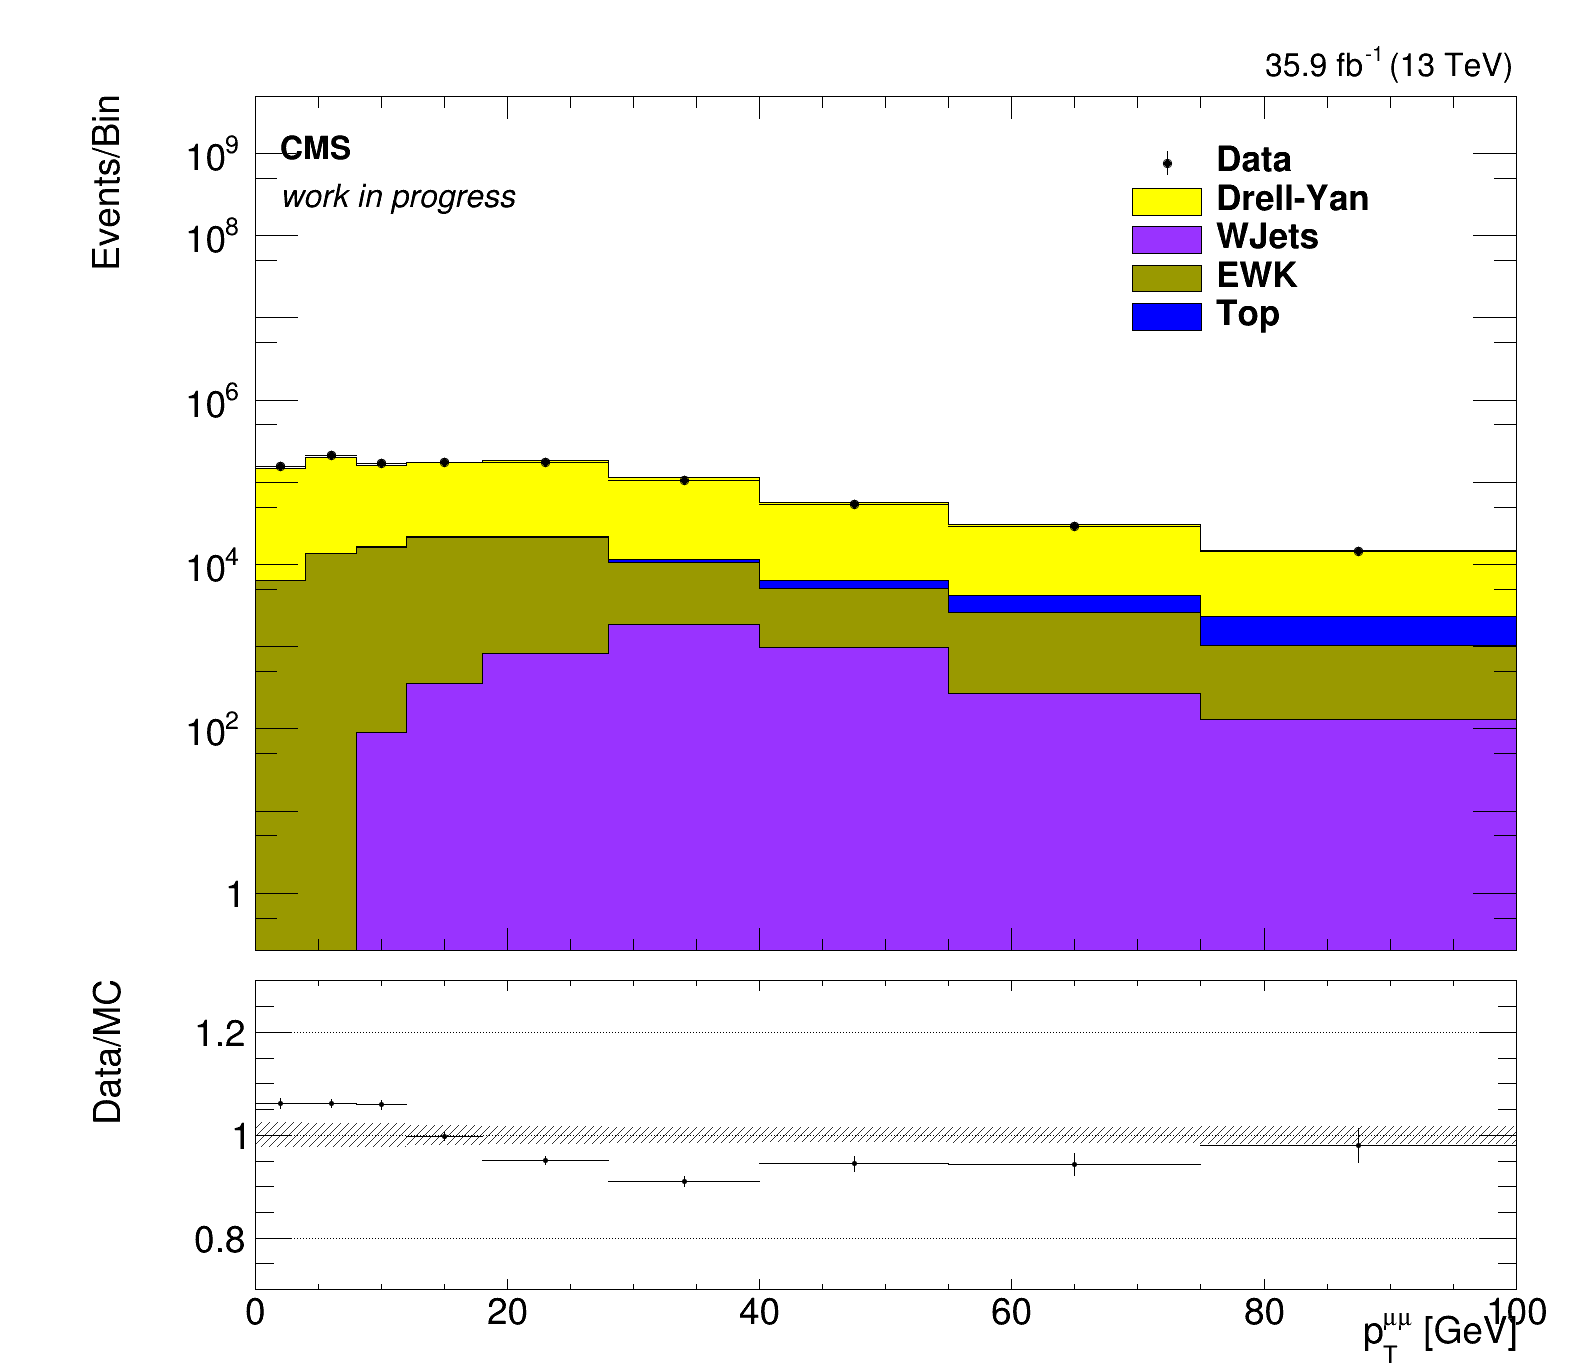

In [11]:
detUnfold_muon_2016.drawDetPlot("Pt", "pt[UO];mass[UOC1]", True, "ID")

ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: detector_level_Pt
Info in <TCanvas::Print>: png file detector_Pt.png has been created


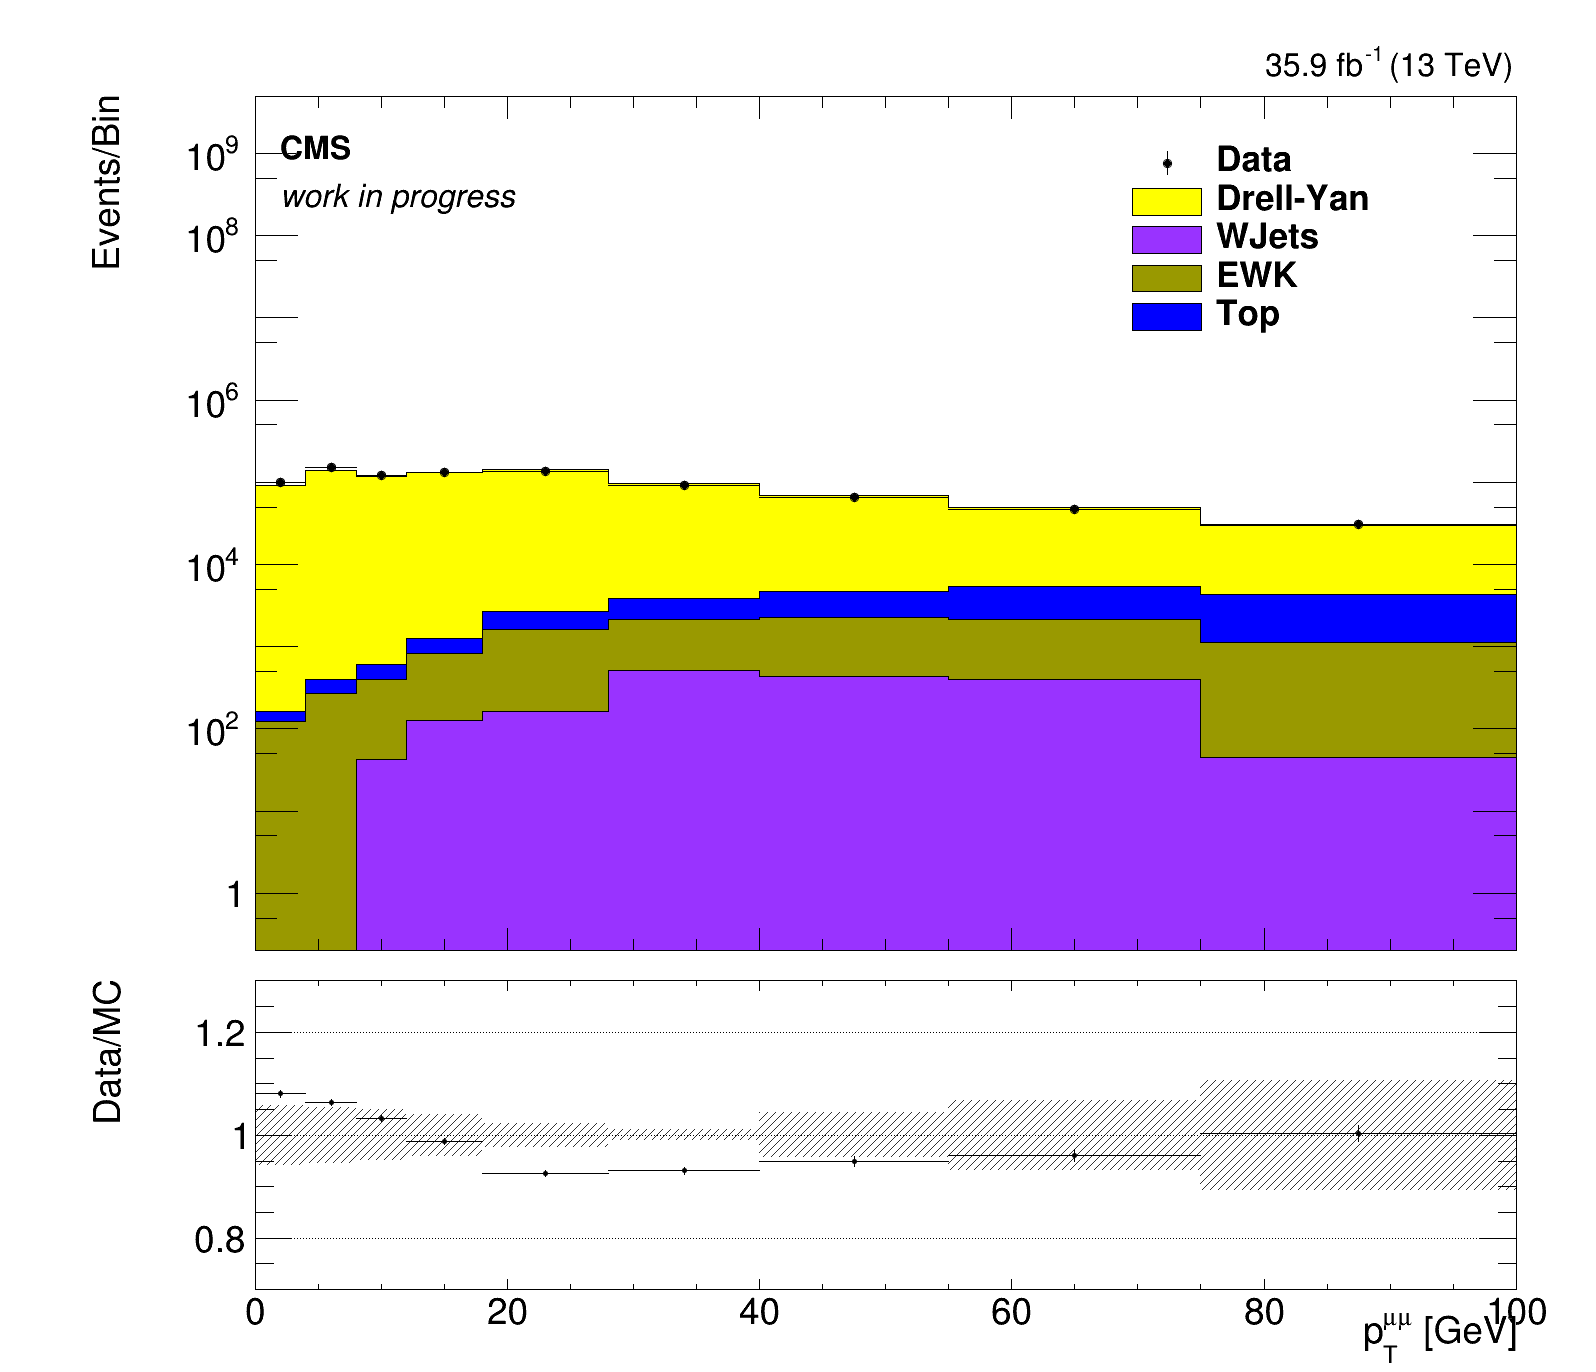

In [12]:
detUnfold_muon_2016.drawDetPlot("Pt", "pt[UO];mass[UOC4]", True, "Scale")

ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)


Info in <TCanvas::Print>: png file detector_Mass.png has been created


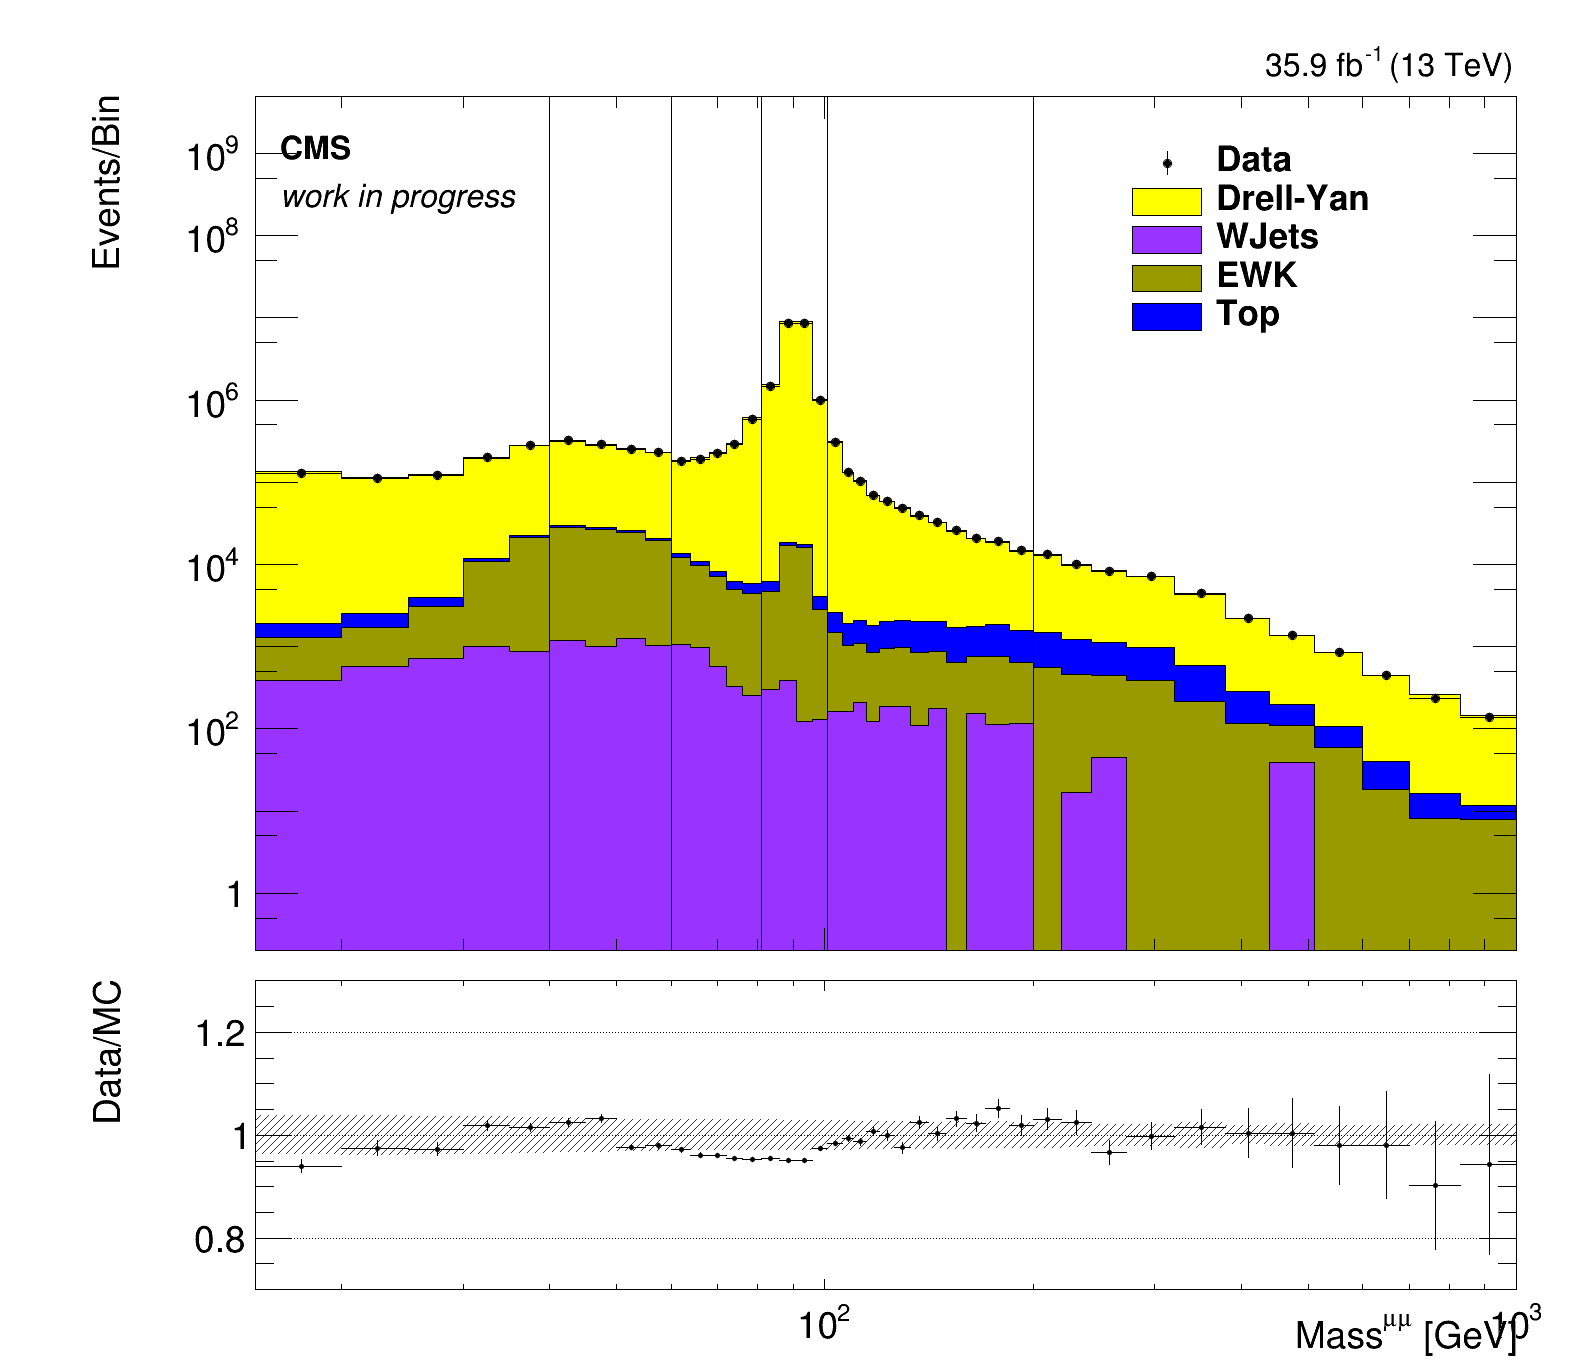

In [13]:
detUnfold_muon_2016.drawDetPlot("Mass", "mass[UO];pt[UOC0]", True, "AlphaS")

In [14]:
#detUnfold_muon_2016.subFake()

In [15]:
#detUnfold_muon_2016.doUnfold()

In [16]:
#detUnfold_muon_2016.setMeanValues()